<a href="https://colab.research.google.com/github/quanho114/Predict-Customer-Churn/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# QUAN TRỌNG: CHẠY CELL NÀY ĐỂ IMPORT CÁC NGUỒN DỮ LIỆU TỪ KAGGLE
import kagglehub
hmq114_dataset_path = kagglehub.dataset_download('hmq114/dataset')

print('Data source import complete.')

Data source import complete.


<center>
  <span style="color:#2E8B57; font-family:serif; font-size:34px; font-weight:bold;">
    DỰ ĐOÁN KHÁCH HÀNG RỜI BỎ DỊCH VỤ VIỄN THÔNG 📈
  </span>
</center>

## Các đặc trưng (Features):

- `customerID`: Mã định danh duy nhất của khách hàng.  
- `gender`: Giới tính của khách hàng.  
- `SeniorCitizen`: Biến nhị phân cho biết khách hàng có phải là người cao tuổi hay không.  
- `Partner`: Biến nhị phân cho biết khách hàng có vợ/chồng hoặc người sống chung hay không.  
- `Dependents`: Biến nhị phân cho biết khách hàng có người phụ thuộc hay không.  
- `tenure`: Số tuần mà khách hàng đã sử dụng dịch vụ.  
- `PhoneService`: Khách hàng có sử dụng dịch vụ điện thoại hay không.  
- `MultipleLines`: Khách hàng có sử dụng nhiều đường dây điện thoại hay không.  
- `InternetService`: Loại dịch vụ Internet mà khách hàng sử dụng (`"DSL"`, `"Fiber optic"`, `"No"`).  
- `OnlineSecurity`: Khách hàng có sử dụng dịch vụ bảo mật trực tuyến hay không.  
- `OnlineBackup`: Khách hàng có sử dụng dịch vụ sao lưu trực tuyến hay không.  
- `DeviceProtection`: Khách hàng có sử dụng dịch vụ bảo vệ thiết bị hay không.  
- `TechSupport`: Khách hàng có sử dụng dịch vụ hỗ trợ kỹ thuật hay không.  
- `StreamingTV`: Khách hàng có sử dụng dịch vụ xem TV trực tuyến hay không.  
- `StreamingMovies`: Khách hàng có sử dụng dịch vụ xem phim trực tuyến hay không.  
- `Contract`: Loại hợp đồng của khách hàng (`'Month-to-month'`, `'One year'`, `'Two year'`).  
- `PaperlessBilling`: Khách hàng có sử dụng hóa đơn điện tử hay không.  
- `PaymentMethod`: Phương thức thanh toán của khách hàng.  
- `MonthlyCharges`: Số tiền phí hàng tháng (đơn vị: `$`).  
- `TotalCharges`: Tổng số tiền đã chi trả từ trước đến nay (đơn vị: `$`).


## Biến mục tiêu (Target Variable):

- `Churn`: Khách hàng "No" (ở lại) hoặc "Yes" (rời đi).


# Thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

In [ ]:
file_path = os.path.join(hmq114_dataset_path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(file_path)
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# Phân tích dữ liệu

In [ ]:
df.shape

(7043, 21)

In [ ]:
def data_analysis(df):
    print("\n=== Data types ===")
    display(df.dtypes)
    print("\n=== Missing values ===")
    print(df.isnull().sum())
    print("\n=== Descriptive statistics ===")
    display(df.describe())
    print("\n=== Duplicate rows ===")
    print(df.duplicated().sum())
    print("\n=== Unique values in each column ===")
    for column in df.columns:
        print(f"\n{column}:", df[column].unique())
    return df

df = data_analysis(df)


=== Data types ===


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object



=== Missing values ===
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

=== Descriptive statistics ===


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



=== Duplicate rows ===
0

=== Unique values in each column ===

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' '

# Trực quan hóa dữ liệu

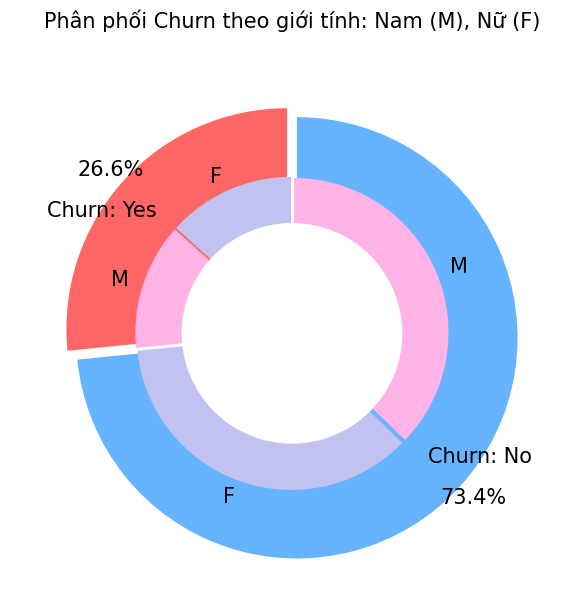

In [ ]:
plt.figure(figsize=(6, 6))

labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]

colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']

explode = (0.3, 0.3)
explode_gender = (0.1, 0.1, 0.1, 0.1)

textprops = {"fontsize": 15}

# Vẽ biểu đồ
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        pctdistance=1.08,
        labeldistance=0.8,
        colors=colors,
        startangle=90,
        frame=True,
        explode=explode,
        radius=10,
        textprops=textprops,
        counterclock=True)

plt.pie(sizes_gender,
        labels=labels_gender,
        colors=colors_gender,
        startangle=90,
        explode=explode_gender,
        radius=7,
        textprops=textprops,
        counterclock=True)

# Vẽ hình tròn ở giữa để tạo hình donut
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Phân phối Churn theo giới tính: Nam (M), Nữ (F)', fontsize=15, y=1.1)
plt.axis('equal')  # Đảm bảo hình tròn
plt.tight_layout()
plt.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Phân phối thể hiện hợp đồng của khách hàng<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Phân phối Phương thức Thanh toán</b>")
fig.show()

<ipython-input-37-68858a6886d2>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-68858a6886d2>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




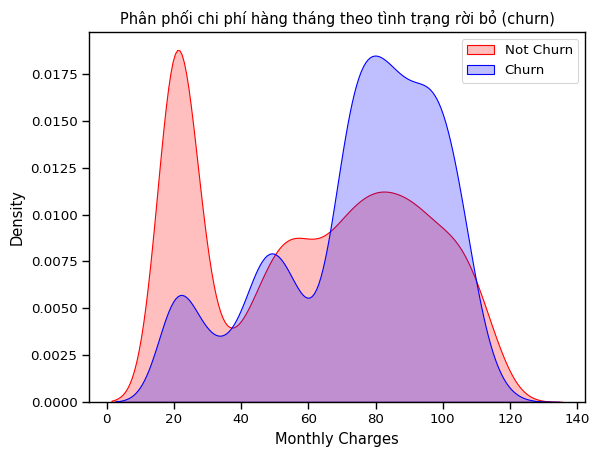

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Phân phối chi phí hàng tháng theo tình trạng rời bỏ (churn)');

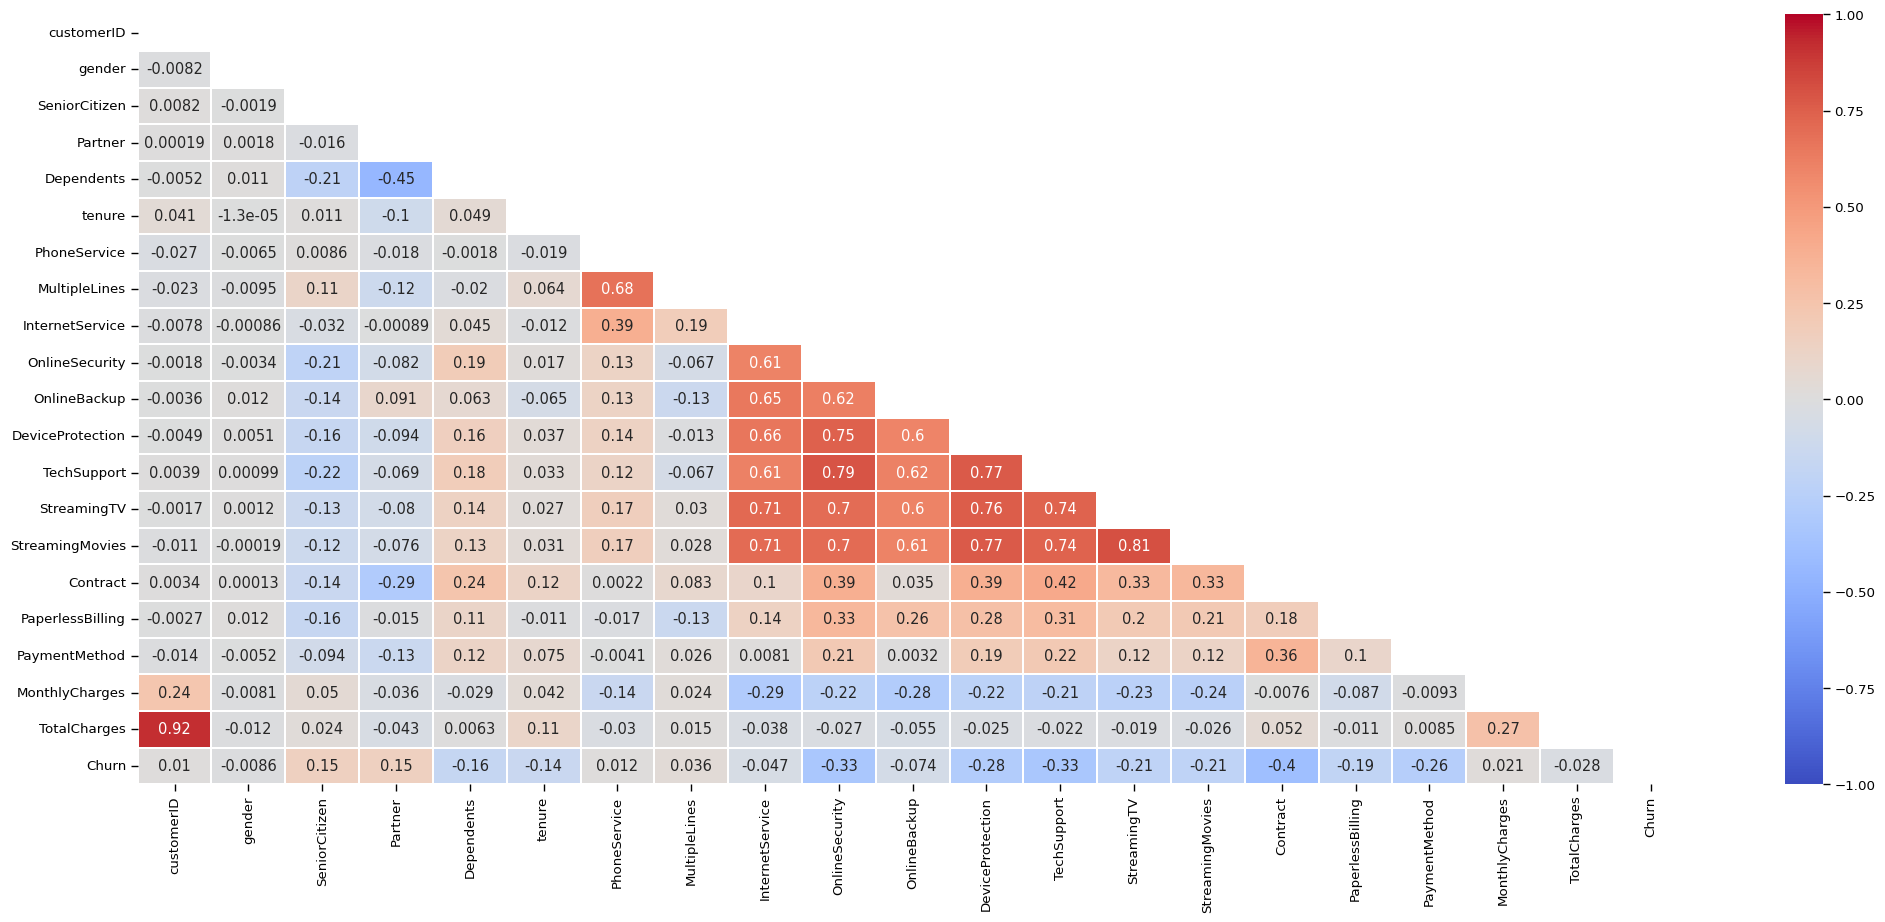

In [ ]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# Tiền Xử lý dữ liệu

## Xử lý dữ liệu khuyết

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Tính phần tỉ lệ khuyết
missing_rows = df['TotalCharges'].isnull().sum()
total_rows = len(df)
missing_percentage = (missing_rows / total_rows) * 100

print(f"Số dòng có giá trị thiếu: {missing_rows}")
print(f"Tổng số dòng: {total_rows}")
print(f"Phần trăm dữ liệu thiếu: {missing_percentage:.2f}%")

# Nếu tỷ lệ thiếu < 5%, xóa các dòng này
if missing_percentage < 5:
    df = df.dropna(subset=['TotalCharges'])
    print(f"Đã xóa {missing_rows} dòng có dữ liệu thiếu")
    print(f"Số dòng còn lại: {len(df)}")
else:
    print("Tỷ lệ dữ liệu thiếu > 5%, nên không xóa các dòng này")

Số dòng có giá trị thiếu: 11
Tổng số dòng: 7043
Phần trăm dữ liệu thiếu: 0.16%
Đã xóa 11 dòng có dữ liệu thiếu
Số dòng còn lại: 7032


## Xóa đặc trưng không cần thiết

In [ ]:
df_processed = df.drop('customerID', axis=1)
print(f"Columns after removing customerID: {df_processed.columns.tolist()}")

Columns after removing customerID: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


## Mã hóa biến phân loại

In [ ]:
# Define column types
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
multi_category_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                         'Contract', 'PaymentMethod']

# Create encoded dataframe
df_encoded = df_processed.copy()

# Binary encoding
label_encoders = {}
for col in binary_columns:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# One-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=multi_category_columns, drop_first=False)

# Encode target variable
target_encoder = LabelEncoder()
df_encoded['Churn'] = target_encoder.fit_transform(df_encoded['Churn'])

print(f"Shape after encoding: {df_encoded.shape}")

Shape after encoding: (7032, 41)


## Chuẩn hóa đặc trưng

In [ ]:
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [ ]:
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

with open('target_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)

with open('feature_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

column_info = {
    'numerical_columns': numerical_columns,
    'binary_columns': binary_columns,
    'multi_category_columns': multi_category_columns,
    'all_feature_columns': [col for col in df_encoded.columns if col != 'Churn']
}

with open('column_info.pkl', 'wb') as f:
    pickle.dump(column_info, f)

df_encoded.to_csv('processed_churn_data.csv', index=False)

# Kiếm tra đa cộng tuyến

In [ ]:
X_for_vif = df_encoded.drop('Churn', axis=1)

print("Tính VIF cho các biến số")
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(df_encoded[numerical_columns].values, i)
                   for i in range(len(numerical_columns))]

print("VIF:")
print(vif_data)
print()

high_vif_features = vif_data[vif_data['VIF'] > 10]['Feature'].tolist()
if high_vif_features:
    print(f"Biến có VIF cao (>10): {high_vif_features}")
    print("Cân nhắc loại bỏ để tránh đa cộng tuyêbs")
else:
    print("Không có biến nào có VIF cao (>10)")
print()

Tính VIF cho các biến số
VIF:
          Feature       VIF
0          tenure  5.844646
1  MonthlyCharges  3.225293
2    TotalCharges  9.526697

Không có biến nào có VIF cao (>10)



# Phân chia dữ liệu

In [ ]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42, stratify=y)

Features shape: (7032, 40)
Target shape: (7032,)


# Cân bằng dữ liệu với SMOTE

Trước SMOTE:
Class 0 (Không rời bỏ): 4130
Class 1 (Rời bỏ): 1495


<ipython-input-47-23657d3f2014>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




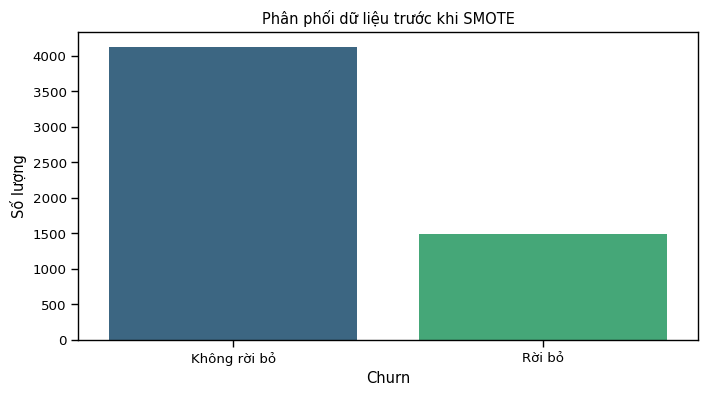

Sau khi SMOTE:
Class 0 (Không rời bỏ): 4130
Class 1 (Rời bỏ): 4130
Training set sau khi SMOTE: (8260, 40)


<ipython-input-47-23657d3f2014>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




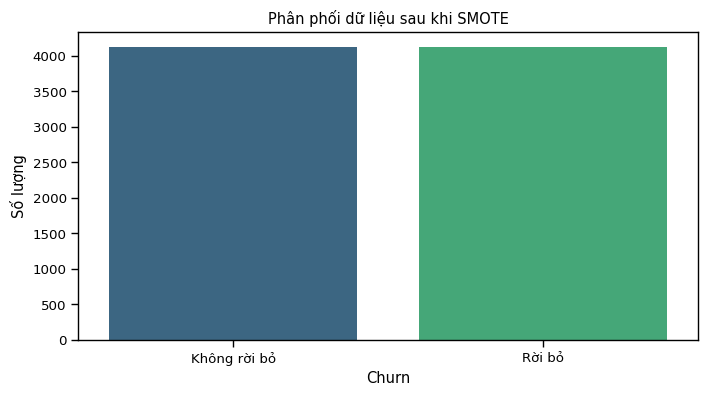

In [ ]:
# Trước SMOTE
class_counts_before = y_train.value_counts()
print("Trước SMOTE:")
print(f"Class 0 (Không rời bỏ): {class_counts_before[0]}")
print(f"Class 1 (Rời bỏ): {class_counts_before[1]}")

# Biểu đồ
plt.figure(figsize=(8, 4))
sns.barplot(x=class_counts_before.index, y=class_counts_before.values, palette='viridis')
plt.title('Phân phối dữ liệu trước khi SMOTE')
plt.ylabel('Số lượng')
plt.xticks(ticks=[0, 1], labels=['Không rời bỏ', 'Rời bỏ'])
plt.show()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Sau khi SMOTE
class_counts_after = y_train_smote.value_counts()
print("Sau khi SMOTE:")
print(f"Class 0 (Không rời bỏ): {class_counts_after[0]}")
print(f"Class 1 (Rời bỏ): {class_counts_after[1]}")
print(f"Training set sau khi SMOTE: {X_train_smote.shape}")

plt.figure(figsize=(8, 4))
sns.barplot(x=class_counts_after.index, y=class_counts_after.values, palette='viridis')
plt.title('Phân phối dữ liệu sau khi SMOTE')
plt.ylabel('Số lượng')
plt.xticks(ticks=[0, 1], labels=['Không rời bỏ', 'Rời bỏ'])
plt.show()
print()

# Huấn luyện mô hình

In [ ]:
def train_baseline_model(X_train, y_train, random_state=42):
    """
    Huấn luyện baseline Logistic Regression
    """

    lr_baseline = LogisticRegression(random_state=random_state, max_iter=1000)
    lr_baseline.fit(X_train, y_train)

    cv_scores = cross_val_score(lr_baseline, X_train, y_train, cv=5, scoring='roc_auc')

    print(f"5-Fold CV ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    return lr_baseline, cv_scores


In [ ]:
# Baseline model với SMOTE
baseline_model_smote, cv_scores = train_baseline_model(X_train_smote, y_train_smote)

5-Fold CV ROC-AUC: 0.9154 (+/- 0.1023)


In [ ]:
# Baseline model không SMOTE
baseline_model_no_smote, cv_scores = train_baseline_model(X_train, y_train)

5-Fold CV ROC-AUC: 0.8460 (+/- 0.0379)


## Đánh giá mô hình

In [ ]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    roc_auc = roc_auc_score(y_test, y_proba)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"\n{'='*60}")
    print(f"ĐÁNH GIÁ MÔ HÌNH: {model_name}")
    print(f"{'='*60}")

    print(f"Accuracy:           {accuracy:.4f}")
    print(f"Balanced Accuracy:  {balanced_acc:.4f}")
    print(f"Precision:          {precision:.4f}")
    print(f"Recall:             {recall:.4f}")
    print(f"F1 Score:           {f1:.4f}")
    print(f"F2 Score:           {f2:.4f} (ưu tiên recall)")
    print(f"ROC AUC:            {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Không rời bỏ', 'Rời bỏ'],
                yticklabels=['Không rời bỏ', 'Rời bỏ'])
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
    plt.ylabel('Thực tế', fontsize=12)
    plt.xlabel('Dự đoán', fontsize=12)

    # Classification Report
    print(f"\nCLASSIFICATION REPORT:")
    print(classification_report(y_test, y_pred, target_names=['Không rời bỏ', 'Rời bỏ']))

    return {
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'f2': f2,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_proba': y_proba
    }

def visualize_model_performance(model_results, model_name):
    """
    Hàm trực quan hóa kết quả của model

    Parameters:
    -----------
    model_results : dict
        Dictionary chứa các metrics của model
    model_name : str
        Tên của model để hiển thị
    """
    print(f"\n{'='*60}")
    print(f"TÓM TẮT KẾT QUẢ {model_name}:")
    print(f"{'='*60}")

    # Tạo bảng tóm tắt
    summary = pd.DataFrame({
        'Metric': ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC AUC'],
        'Value': [
            model_results['accuracy'],
            model_results['balanced_accuracy'],
            model_results['precision'],
            model_results['recall'],
            model_results['f1'],
            model_results['f2'],
            model_results['roc_auc']
        ]
    })

    print(summary.to_string(index=False, float_format='%.4f'))

    # Vẽ biểu đồ tóm tắt metrics
    plt.figure(figsize=(10, 6))
    metrics_for_plot = ['accuracy', 'precision', 'recall', 'f1', 'f2', 'roc_auc']
    values_for_plot = [model_results[metric] for metric in metrics_for_plot]

    bars = plt.bar(metrics_for_plot, values_for_plot,
                   color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c'])

    for bar, value in zip(bars, values_for_plot):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.title(f'Hiệu suất Mô hình {model_name}', fontsize=14)
    plt.ylabel('Giá trị Metric', fontsize=12)
    plt.xlabel('Metrics', fontsize=12)
    plt.ylim(0, 1.1)
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


ĐÁNH GIÁ MÔ HÌNH: Baseline Logistic Regression not smote
Accuracy:           0.8038
Balanced Accuracy:  0.7299
Precision:          0.6485
Recall:             0.5722
F1 Score:           0.6080
F2 Score:           0.5860 (ưu tiên recall)
ROC AUC:            0.8359

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

Không rời bỏ       0.85      0.89      0.87      1033
      Rời bỏ       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


TÓM TẮT KẾT QUẢ Baseline (No SMOTE):
           Metric  Value
         Accuracy 0.8038
Balanced Accuracy 0.7299
        Precision 0.6485
           Recall 0.5722
         F1 Score 0.6080
         F2 Score 0.5860
          ROC AUC 0.8359


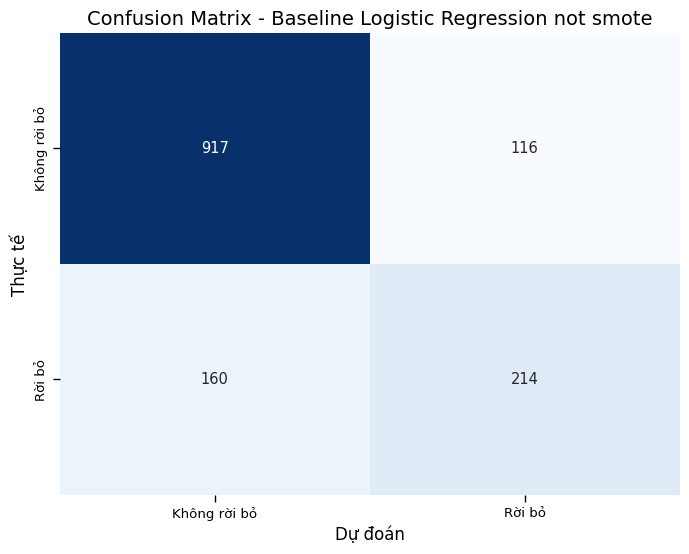

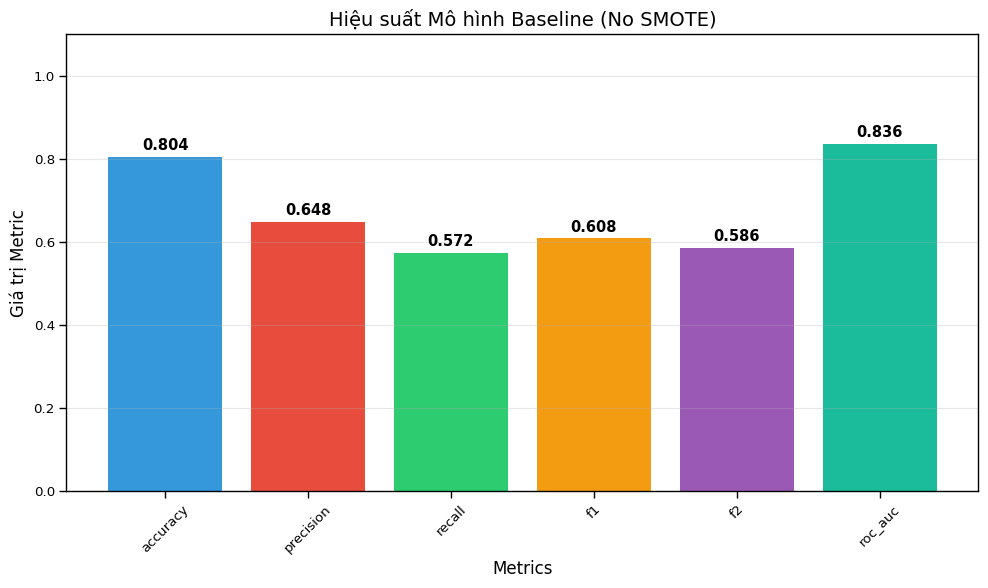


ĐÁNH GIÁ MÔ HÌNH: Baseline Logistic Regression with SMOTE
Accuracy:           0.7598
Balanced Accuracy:  0.7383
Precision:          0.5373
Recall:             0.6925
F1 Score:           0.6051
F2 Score:           0.6547 (ưu tiên recall)
ROC AUC:            0.8264

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

Không rời bỏ       0.88      0.78      0.83      1033
      Rời bỏ       0.54      0.69      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407


TÓM TẮT KẾT QUẢ Baseline (With SMOTE):
           Metric  Value
         Accuracy 0.7598
Balanced Accuracy 0.7383
        Precision 0.5373
           Recall 0.6925
         F1 Score 0.6051
         F2 Score 0.6547
          ROC AUC 0.8264


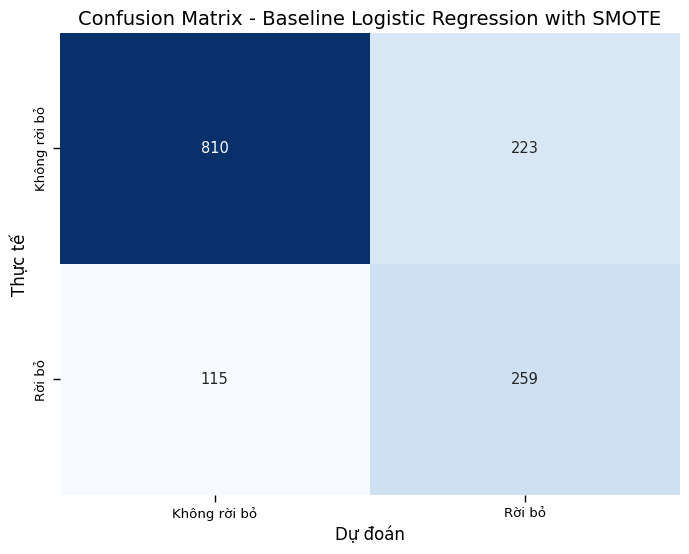

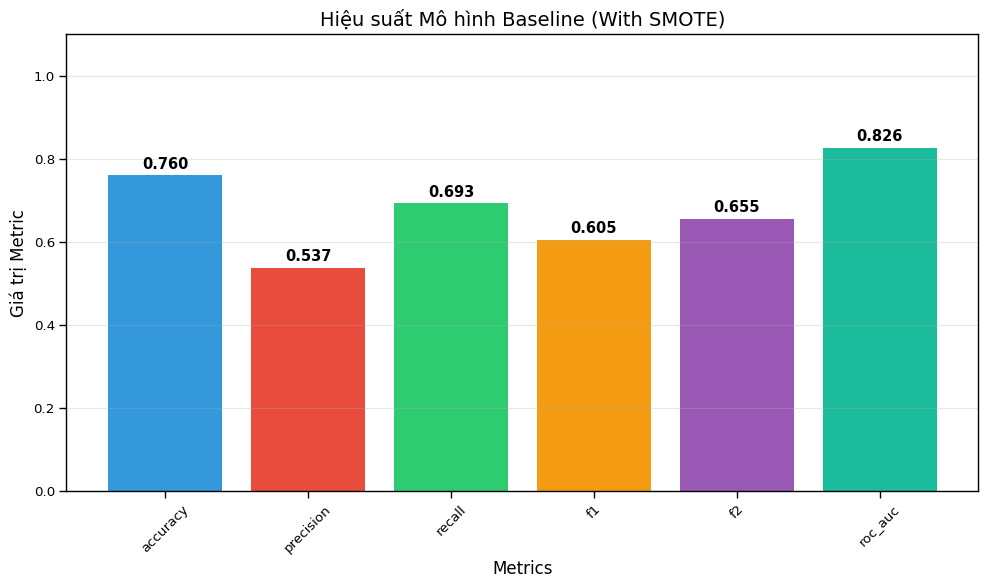

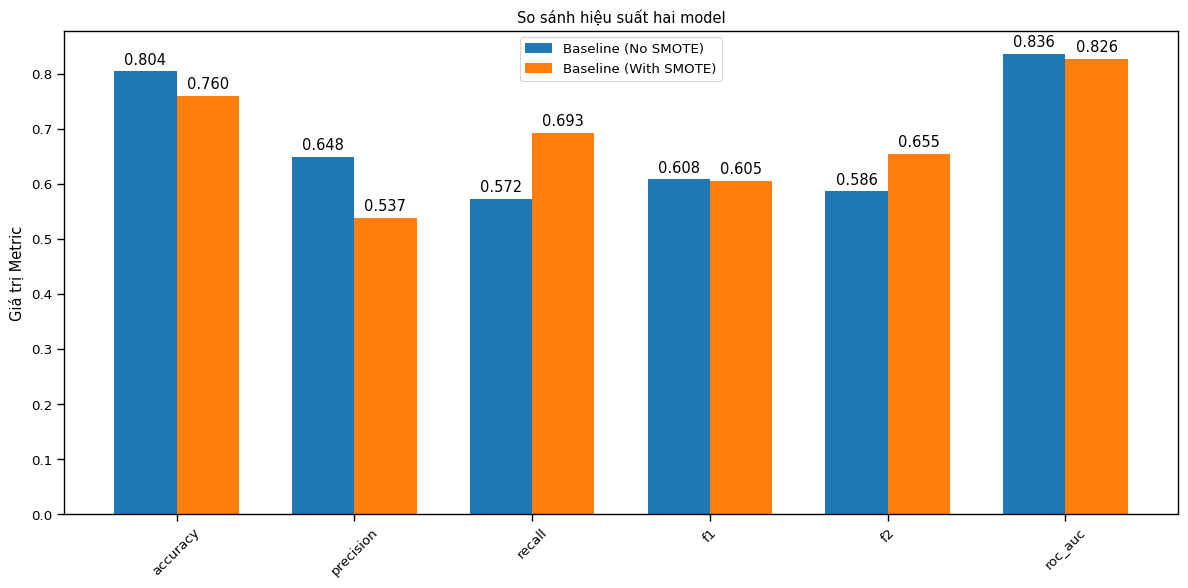

In [ ]:
# 1. Cho baseline không SMOTE
baseline_results = evaluate_model(
    baseline_model_no_smote, X_test, y_test,
    "Baseline Logistic Regression not smote"
)
visualize_model_performance(baseline_results, "Baseline (No SMOTE)")

# 2. Cho baseline có SMOTE
baseline_results_smote = evaluate_model(
    baseline_model_smote, X_test, y_test,
    "Baseline Logistic Regression with SMOTE"
)
visualize_model_performance(baseline_results_smote, "Baseline (With SMOTE)")

def compare_models_visualization(model1_results, model2_results, model1_name, model2_name):
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'f2', 'roc_auc']
    model1_values = [model1_results[metric] for metric in metrics]
    model2_values = [model2_results[metric] for metric in metrics]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width/2, model1_values, width, label=model1_name)
    rects2 = ax.bar(x + width/2, model2_values, width, label=model2_name)

    ax.set_ylabel('Giá trị Metric')
    ax.set_title('So sánh hiệu suất hai model')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.3f}',
                        xy=(rect.get_x() + rect.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.tight_layout()
    plt.show()

# Sử dụng hàm so sánh
compare_models_visualization(
    baseline_results,
    baseline_results_smote,
    "Baseline (No SMOTE)",
    "Baseline (With SMOTE)"
)

## Tối ưu siêu tham số

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


250 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

Tham số tốt nhất: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
F2 score tốt nhất (CV): 0.8319

ĐÁNH GIÁ MÔ HÌNH: Tuned Logistic Regression
Accuracy:           0.7584
Balanced Accuracy:  0.7374
Precision:          0.5351
Recall:             0.6925
F1 Score:           0.6037
F2 Score:           0.6540 (ưu tiên recall)
ROC AUC:            0.8266

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

Không rời bỏ       0.88      0.78      0.83      1033
      Rời bỏ       0.54      0.69      0.60       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.71      1407
weighted avg       0.78      0.76      0.77      1407



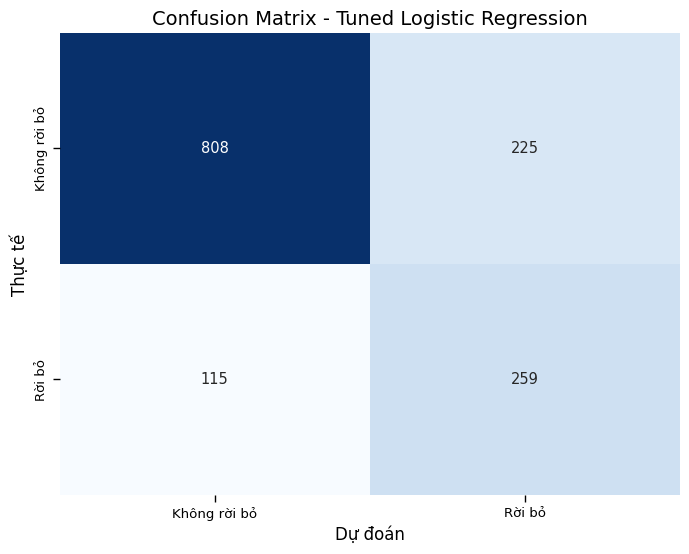

In [ ]:
def tune_hyperparameters(X_train, y_train, X_test, y_test):
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', None],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'class_weight': [None, 'balanced']
    }

    total_combinations = np.prod([len(v) for v in param_grid.values()])

    f2_scorer = make_scorer(fbeta_score, beta=2)

    grid_search = GridSearchCV(
        LogisticRegression(random_state=42),
        param_grid,
        cv=5,
        scoring=f2_scorer,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    print(f"Tham số tốt nhất: {grid_search.best_params_}")
    print(f"F2 score tốt nhất (CV): {grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_
    results = evaluate_model(best_model, X_test, y_test, "Tuned Logistic Regression")

    return best_model, results, grid_search

# Chạy hyperparameter tuning
tuned_model_smote, tuned_results_smote, grid_search_smote = tune_hyperparameters(X_train_smote, y_train_smote, X_test, y_test)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


250 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

Tham số tốt nhất: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
F2 score tốt nhất (CV): 0.7261

ĐÁNH GIÁ MÔ HÌNH: Tuned Logistic Regression
Accuracy:           0.7249
Balanced Accuracy:  0.7470
Precision:          0.4893
Recall:             0.7941
F1 Score:           0.6055
F2 Score:           0.7061 (ưu tiên recall)
ROC AUC:            0.8351

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

Không rời bỏ       0.90      0.70      0.79      1033
      Rời bỏ       0.49      0.79      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.72      0.74      1407



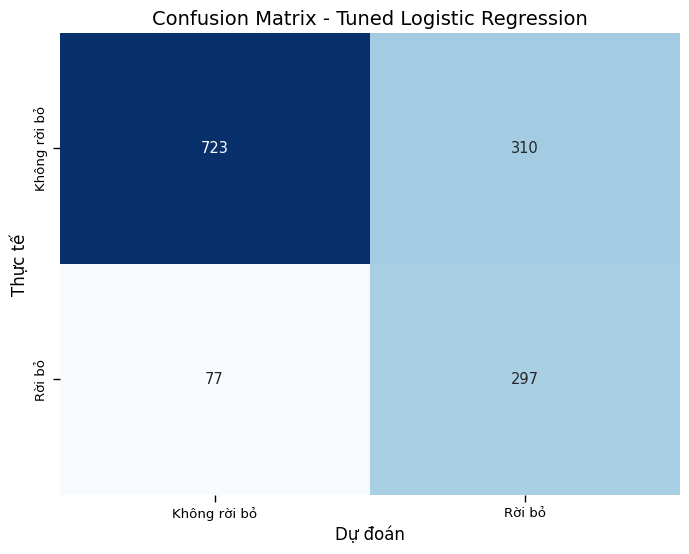

In [ ]:
# tuning model với data không SMOTE
tuned_model, tuned_results, grid_search = tune_hyperparameters(X_train, y_train, X_test, y_test)

# Lưu mô hình

SO SÁNH TẤT CẢ CÁC MODEL:
            Model  F2_Score  Recall  Precision  Accuracy  ROC_AUC
   Tuned_No_SMOTE    0.7061  0.7941     0.4893    0.7249   0.8351
   Baseline_SMOTE    0.6547  0.6925     0.5373    0.7598   0.8264
      Tuned_SMOTE    0.6540  0.6925     0.5351    0.7584   0.8266
Baseline_No_SMOTE    0.5860  0.5722     0.6485    0.8038   0.8359

MODEL TỐT NHẤT: Tuned_No_SMOTE
   F2 Score: 0.7061
   Recall: 0.7941
   Precision: 0.4893


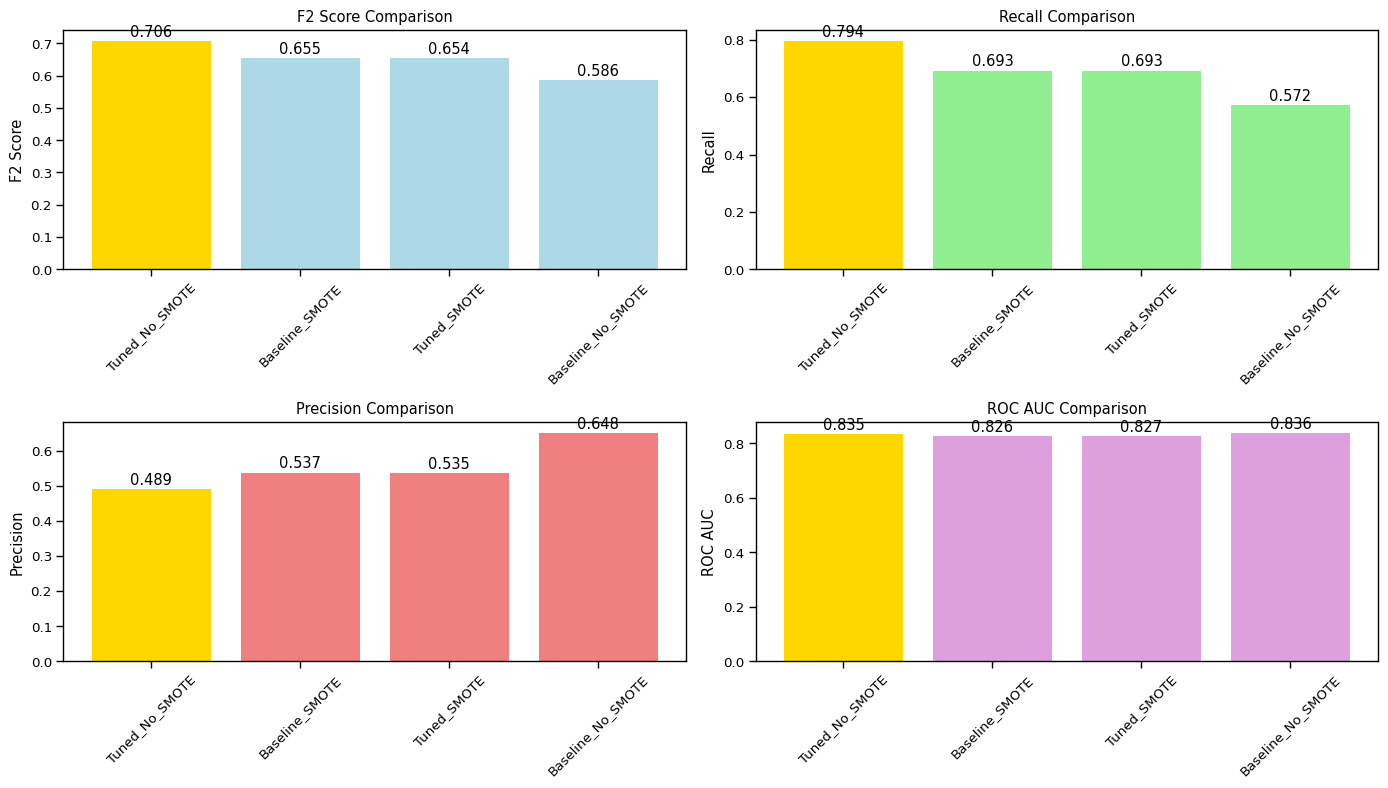


ĐÃ LƯU:
   - best_churn_model.pkl
   - best_model_info.pkl
   - models_comparison.csv


In [ ]:
def select_and_save_best_model_v2(models_dict):
    print("="*70)
    print("SO SÁNH TẤT CẢ CÁC MODEL:")
    print("="*70)

    comparison_data = []
    best_f2 = 0
    best_model_name = ""
    best_model = None
    best_results = None
    best_grid_search = None

    for model_name, model_info in models_dict.items():
        results = model_info['results']
        f2_score = results['f2']

        comparison_data.append({
            'Model': model_name,
            'F2_Score': f2_score,
            'Recall': results['recall'],
            'Precision': results['precision'],
            'Accuracy': results['accuracy'],
            'ROC_AUC': results['roc_auc']
        })

        # Tìm model tốt nhất dựa trên F2 score
        if f2_score > best_f2:
            best_f2 = f2_score
            best_model_name = model_name
            best_model = model_info['model']
            best_results = results
            best_grid_search = model_info.get('grid_search', None)

    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.sort_values('F2_Score', ascending=False)

    print(comparison_df.to_string(index=False, float_format='%.4f'))

    # Thông báo model tốt nhất
    print(f"\nMODEL TỐT NHẤT: {best_model_name}")
    print(f"   F2 Score: {best_f2:.4f}")
    print(f"   Recall: {best_results['recall']:.4f}")
    print(f"   Precision: {best_results['precision']:.4f}")

    # Lưu model tốt nhất
    with open('best_churn_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)

    # Lưu thông tin model
    model_info = {
        'model_name': best_model_name,
        'model_type': best_model_name,
        'metrics': best_results,
        'f2_score': best_results['f2'],
        'recall': best_results['recall'],
        'precision': best_results['precision'],
        'best_params': best_grid_search.best_params_ if best_grid_search else None
    }

    with open('best_model_info.pkl', 'wb') as f:
        pickle.dump(model_info, f)

    # Lưu bảng so sánh
    comparison_df.to_csv('models_comparison.csv', index=False)

    # Vẽ biểu đồ so sánh
    plt.figure(figsize=(14, 8))

    # Subplot 1: F2 Score comparison
    plt.subplot(2, 2, 1)
    bars1 = plt.bar(comparison_df['Model'], comparison_df['F2_Score'],
                    color=['gold' if name == best_model_name else 'lightblue'
                          for name in comparison_df['Model']])
    plt.title('F2 Score Comparison')
    plt.ylabel('F2 Score')
    plt.xticks(rotation=45)
    for bar, value in zip(bars1, comparison_df['F2_Score']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.3f}', ha='center', va='bottom')

    # Subplot 2: Recall comparison
    plt.subplot(2, 2, 2)
    bars2 = plt.bar(comparison_df['Model'], comparison_df['Recall'],
                    color=['gold' if name == best_model_name else 'lightgreen'
                          for name in comparison_df['Model']])
    plt.title('Recall Comparison')
    plt.ylabel('Recall')
    plt.xticks(rotation=45)
    for bar, value in zip(bars2, comparison_df['Recall']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.3f}', ha='center', va='bottom')

    # Subplot 3: Precision comparison
    plt.subplot(2, 2, 3)
    bars3 = plt.bar(comparison_df['Model'], comparison_df['Precision'],
                    color=['gold' if name == best_model_name else 'lightcoral'
                          for name in comparison_df['Model']])
    plt.title('Precision Comparison')
    plt.ylabel('Precision')
    plt.xticks(rotation=45)
    for bar, value in zip(bars3, comparison_df['Precision']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.3f}', ha='center', va='bottom')

    # Subplot 4: ROC AUC comparison
    plt.subplot(2, 2, 4)
    bars4 = plt.bar(comparison_df['Model'], comparison_df['ROC_AUC'],
                    color=['gold' if name == best_model_name else 'plum'
                          for name in comparison_df['Model']])
    plt.title('ROC AUC Comparison')
    plt.ylabel('ROC AUC')
    plt.xticks(rotation=45)
    for bar, value in zip(bars4, comparison_df['ROC_AUC']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    print(f"\nĐÃ LƯU:")
    print(f"   - best_churn_model.pkl")
    print(f"   - best_model_info.pkl")
    print(f"   - models_comparison.csv")

    return best_model, model_info, comparison_df

# Sử dụng hàm mới:
models_to_compare = {
    'Baseline_No_SMOTE': {
        'model': baseline_model_no_smote,
        'results': baseline_results
    },
    'Baseline_SMOTE': {
        'model': baseline_model_smote,
        'results': baseline_results_smote
    },
    'Tuned_No_SMOTE': {
        'model': tuned_model,
        'results': tuned_results,
        'grid_search': grid_search
    },
    'Tuned_SMOTE': {
        'model': tuned_model_smote,
        'results': tuned_results_smote,
        'grid_search': grid_search_smote
    }
}

# Chạy so sánh và chọn model tốt nhất
best_model, model_info, comparison_df = select_and_save_best_model_v2(models_to_compare)